### Count Words

Python project to count words from bigger files.


In [81]:
text = 'This comprehension check is to check for comprehension'

def count_words(text):
    """
    Counter words from a text.
    """
    text = text.lower()
    
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"] 
    for s in skips:
        text = text.replace(s, '')
    
    words_count = {}
    for word in text.split(" "):
        if (word in words_count):
            words_count[word] += 1
        else:
            words_count[word] = 1
    return words_count

count_words(text)

{'this': 1, 'comprehension': 2, 'check': 2, 'is': 1, 'to': 1, 'for': 1}

In [82]:
from collections import Counter

def count_words_fast(text):
    """
    Fast counter words from a text.
    """
    text = text.lower()
    
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"] 
    for s in skips:
        text = text.replace(s, '')
    
    words_count = Counter(text.split(" "))
    return words_count

print(count_words_fast(text))

Counter({'comprehension': 2, 'check': 2, 'this': 1, 'is': 1, 'to': 1, 'for': 1})


In [3]:
def read_book(title_path):
    """
    Read a book from a path.
    """
    with open(title_path, "r", encoding="utf-8") as current_file:
        text = current_file.read()
        text = text.replace("\n","").replace("\r","")
    return text

book = read_book('../_datasets/Books_EngFr/Books_EngFr/English/shakespeare/Romeo and Juliet.txt')
len(book)

169275

In [4]:
#procurar um texto no livro
index = book.find("What's in a name?")
sample_text = book[index : index + 1000]
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [13]:
def word_stats(words_count):
    """
    Returns number of unique words and words frequencies.
    """
    num_unique = len(words_count)
    counts = words_count.values()
    return (num_unique, counts)


book = read_book('../_datasets/Books_EngFr/Books_EngFr/English/shakespeare/Romeo and Juliet.txt')
word_counts = count_words(book)
num_unique, counts = word_stats(word_counts)

print("EN - Quantidade de palavras sem repetir: ", num_unique)
print("EN - Total de palavras: ", sum(counts))


book = read_book('../_datasets/Books_GerPort/Books_GerPort/German/shakespeare/Romeo und Julia.txt')
word_counts = count_words(book)
num_unique, counts = word_stats(word_counts)

print("GE - Quantidade de palavras sem repetir: ", num_unique)
print("GE - Quantidade de palavras: ", sum(counts))

EN - Quantidade de palavras sem repetir:  5118
EN - Total de palavras:  40776
GE - Quantidade de palavras sem repetir:  7527
GE - Quantidade de palavras:  20311


In [35]:
import os
import pandas as pd

language_dir = '../_datasets/Books'

df_books = pd.DataFrame(columns=('language', 'author', 'title', 'length', 'words'))
cod = 1

for language in os.listdir(language_dir):
    for author in os.listdir(language_dir + '/' + language):
        for title in os.listdir(language_dir + '/' + language + '/' + author):
            text = read_book(language_dir + '/' + language + '/' + author + '/' + title)
            (num_unique, counts) = word_stats(count_words_fast(text))
            df_books.loc[cod] = language, author.capitalize(), title.replace('.txt', ''), sum(counts), num_unique
            cod += 1

df_books.head(20)

,language,author,title,length,words
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
6,English,Shakespeare,Romeo and Juliet,40776,5118
7,English,Shakespeare,The Merchant of Venice,20949,4978
8,French,Chevalier,L'åle de sable,73801,18989
9,French,Chevalier,L'enfer et le paradis de l'autre monde,40827,10831
10,French,Chevalier,La capitaine,46306,13083


[]

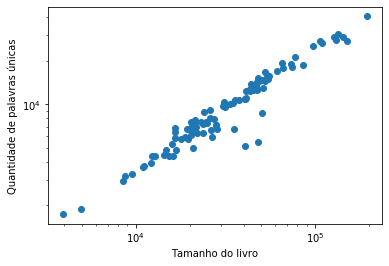

In [45]:
import matplotlib.pyplot as plt

plt.scatter(df_books['length'], df_books['words'])
plt.ylabel('Quantidade de palavras únicas')
plt.xlabel('Tamanho do livro')
#plt.plot()
plt.loglog()

[]

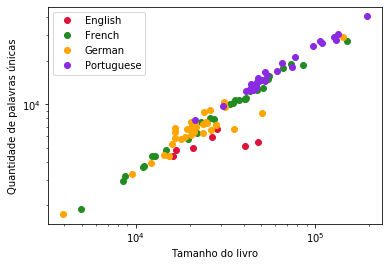

In [61]:
#pegar os linguas dos livros
languages_list = os.listdir(language_dir)
colors = ['crimson', 'forestgreen', 'orange', 'blueviolet']
i = 0

for language in languages_list:
    subset = df_books[df_books['language'] == language]
    plt.loglog(subset.length, subset.words, "o", label=language, color=colors[i])
    i += 1

plt.legend()
plt.xlabel('Tamanho do livro')
plt.ylabel('Quantidade de palavras únicas')
plt.plot()

### Exercise:

In [65]:
import pandas as pd
hamlets = pd.read_csv('../_datasets/hamlets.csv', index_col=0)
hamlets

,language,text
1,English,The Tragedie of Hamlet\n ...
2,German,"Hamlet, Prinz von Dännemark.\n ..."
3,Portuguese,HAMLET\n DRAMA EM ...


In [86]:
language, text = hamlets.iloc[0]

counted_text = count_words_fast(text)

data = pd.DataFrame(columns=('word', 'count'))
data['word'] = counted_text.keys()
data['count'] = counted_text.values()

data.head(30)
data[data['word'] == 'hamlet']

,word,count
3,hamlet,97


In [104]:
def def_frequency(row):
    if (row['count'] > 10):
        return 'frequent'
    elif (1 < row['count'] <= 10):
        return 'infrequent'
    elif (row['count'] == 1):
        return 'unique'

#função lambda para aplicar uma condição na criação de uma nova coluna
data['length'] = data.apply (lambda row: len(row['word']), axis=1)
data['frequency'] = data.apply (lambda row: def_frequency(row), axis=1)

#verificar quantas palavras aparecem uma única vez
data[data['frequency'] == 'unique']

,word,count,length,frequency
6,primus,1,6,unique
7,scoena,1,6,unique
8,prima,1,5,unique
12,francisco,1,9,unique
14,centinels,1,9,unique
...,...,...,...,...
5108,shooteexeunt,1,12,unique
5109,marching,1,8,unique
5110,peale,1,5,unique
5111,ord,1,3,unique


In [131]:
#Criar um dataset que para a linguagem dos livros do dataset "data", definir qual a média do tamanho das palavras
#e a quantidade por cada frequencia
sub_data = data.groupby('frequency').agg({'length':'mean', 'count':'sum'})
sub_data['language'] = language
sub_data

,length,count,language
frequency,,,
frequent,4.371517,65628,English
infrequent,5.825243,5060,English
unique,7.005675,3348,English


In [182]:
#criar uma função para unificar os chamadas acima, podendo fazer por linguagem
#obs.: deixando mais elegante o código
def sumarize_text(language, text):
    
    counted_text = count_words_fast(text)

    data = pd.DataFrame(columns=('word', 'count'))
    data['word'] = counted_text.keys()
    data['count'] = counted_text.values()

    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"
    
    data["length"] = data["word"].apply(len)
    
    sub_data = pd.DataFrame({
        "language": language,
        "frequency": ["frequent","infrequent","unique"],
        "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
        "num_words": data.groupby(by = "frequency").size()
    })

    return sub_data

language, text = hamlets.iloc[0]
grouped_data_en = sumarize_text(language, text)
grouped_data_en

,language,frequency,mean_word_length,num_words
frequency,,,,
frequent,English,frequent,4.371517,323
infrequent,English,infrequent,5.825243,1442
unique,English,unique,7.005675,3348


In [183]:
language, text = hamlets.iloc[1]
grouped_data_ge = sumarize_text(language, text)
grouped_data_ge

,language,frequency,mean_word_length,num_words
frequency,,,,
frequent,German,frequent,4.528053,303
infrequent,German,infrequent,6.481830,1596
unique,German,unique,9.006987,5582


In [184]:
language, text = hamlets.iloc[2]
grouped_data_pt = sumarize_text(language, text)
grouped_data_pt

,language,frequency,mean_word_length,num_words
frequency,,,,
frequent,Portuguese,frequent,4.417625,261
infrequent,Portuguese,infrequent,6.497870,1643
unique,Portuguese,unique,8.669778,5357


[]

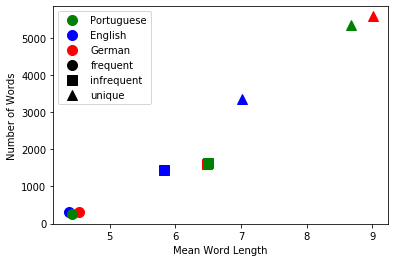

In [185]:
grouped_data = pd.concat([grouped_data_en,  grouped_data_ge, grouped_data_pt])

colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}

import matplotlib.pyplot as plt
for i in range(grouped_data.shape[0]):
    row = grouped_data.iloc[i]
    plt.plot(row.mean_word_length, row.num_words,
        marker=markers[row.frequency],
        color = colors[row.language],
        markersize = 10
    )

color_legend = []
marker_legend = []
for color in colors:
    color_legend.append(
        plt.plot([], [],
        color=colors[color],
        marker="o",
        label = color, markersize = 10, linestyle="None")
    )
for marker in markers:
    marker_legend.append(
        plt.plot([], [],
        color="k",
        marker=markers[marker],
        label = marker, markersize = 10, linestyle="None")
    )
plt.legend(numpoints=1, loc = "upper left")

plt.xlabel("Mean Word Length")
plt.ylabel("Number of Words")
plt.plot()